# Part 1: Loading the dataset

An end-to-end deep learning geospatial segmentation project using Pytorch and TorchGeo packages

## Set up environment

In [2]:
!pip install -q rasterio
!pip install -q torchgeo
!pip install -q rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 932.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.3/833.3 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 17.4 MB/s eta 0

In [3]:
import logging
# this line is to avoid warnings from Rasterio to be printed on screen
# the warning is explained here: https://stackoverflow.com/questions/74089170/suppress-rasterio-warning-warning-1-tiffreaddirectory
logger = logging.getLogger("rasterio")
logger.setLevel(logging.ERROR)

In [4]:
import rasterio as rio
import torchgeo
import torch
from tqdm.notebook import tqdm

## Dataset

[Earth Surface Water Dataset](https://zenodo.org/record/5205674): which has patches from different parts of the world (Figure 1) and its corresponding water masks

<img src="https://static.wixstatic.com/media/717469_724f0beff8764c5fb44ceb22ac4fdf13~mv2.png/v1/fill/w_740,h_374,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/717469_724f0beff8764c5fb44ceb22ac4fdf13~mv2.png" height=300/>

Downloading the data:

In [5]:
!wget https://zenodo.org/record/5205674/files/dset-s2.zip -O dset-s2.zip

--2024-10-29 10:34:37--  https://zenodo.org/record/5205674/files/dset-s2.zip
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/5205674/files/dset-s2.zip [following]
--2024-10-29 10:34:37--  https://zenodo.org/records/5205674/files/dset-s2.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 611792578 (583M) [application/octet-stream]
Saving to: ‘dset-s2.zip’

dset-s2.zip         100%[===================>] 583.45M  14.2MB/s    in 36s     

2024-10-29 10:35:13 (16.3 MB/s) - ‘dset-s2.zip’ saved [611792578/611792578]



In [6]:
!unzip dset-s2.zip

Archive:  dset-s2.zip
   creating: dset-s2/
  inflating: __MACOSX/._dset-s2      
   creating: dset-s2/tra_truth/
   creating: dset-s2/val_truth/
   creating: dset-s2/tra_scene/
   creating: dset-s2/val_scene/
  inflating: dset-s2/tra_truth/S2A_L2A_20190817_N0213_R089_S1_Truth.tif  
  inflating: dset-s2/tra_truth/S2B_L2A_20190818_N0213_R035_S1_Truth.tif  
  inflating: dset-s2/tra_truth/S2A_L2A_20190716_N0213_R063_S3_Truth.tif  
  inflating: dset-s2/tra_truth/S2A_L2A_20190314_N0211_R008_S1_Truth.tif  
  inflating: dset-s2/tra_truth/S2B_L2A_20190807_N0213_R018_S2_Truth.tif  
  inflating: dset-s2/tra_truth/S2B_L2A_20190904_N0213_R132_S2_Truth.tif  
  inflating: dset-s2/tra_truth/S2A_L2A_20190811_N0213_R013_S2_Truth.tif  
  inflating: dset-s2/tra_truth/S2B_L2A_20190506_N0212_R126_S3_Truth.tif  
  inflating: dset-s2/tra_truth/S2A_L2A_20190206_N0211_R067_S1_Truth.tif  
  inflating: dset-s2/tra_truth/S2A_L2A_20190125_N0211_R034_S1_Truth.tif  
  inflating: dset-s2/tra_truth/S2B_L2A_20191023_N0

Explore the dataset

Try to open and plot of the sample image

In [7]:
from pathlib import Path
import rioxarray as rxr
import matplotlib.pyplot as plt

In [8]:
root = Path('dset-s2')
assert root.exists()

In [9]:
train_imgs = list((root/'tra_scene').glob('*.tif'))
train_mask = list((root/'tra_truth').glob("*.tif"))

train_imgs.sort()
train_mask.sort()

print(f"Total images: {len(train_imgs)}")
print(f"Total mask: {len(train_mask)}")

Total images: 64
Total mask: 64


## Display Image

In [10]:
idx = 0
img = rxr.open_rasterio(train_imgs[idx])
mask = rxr.open_rasterio(train_mask[idx])

print(type(img))

<class 'xarray.core.dataarray.DataArray'>


In [11]:
img

<xarray.DataArray (band: 6, y: 764, x: 868)> Size: 8MB
[3978912 values with dtype=uint16]
Coordinates:
  * band         (band) int64 48B 1 2 3 4 5 6
  * x            (x) float64 7kB 3.981e+05 3.982e+05 ... 4.068e+05 4.068e+05
  * y            (y) float64 6kB 4.523e+06 4.523e+06 ... 4.515e+06 4.515e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_XRESOLUTION:  1
    TIFFTAG_YRESOLUTION:  1
    AREA_OR_POINT:        Area
    scale_factor:         1.0
    add_offset:           0.0

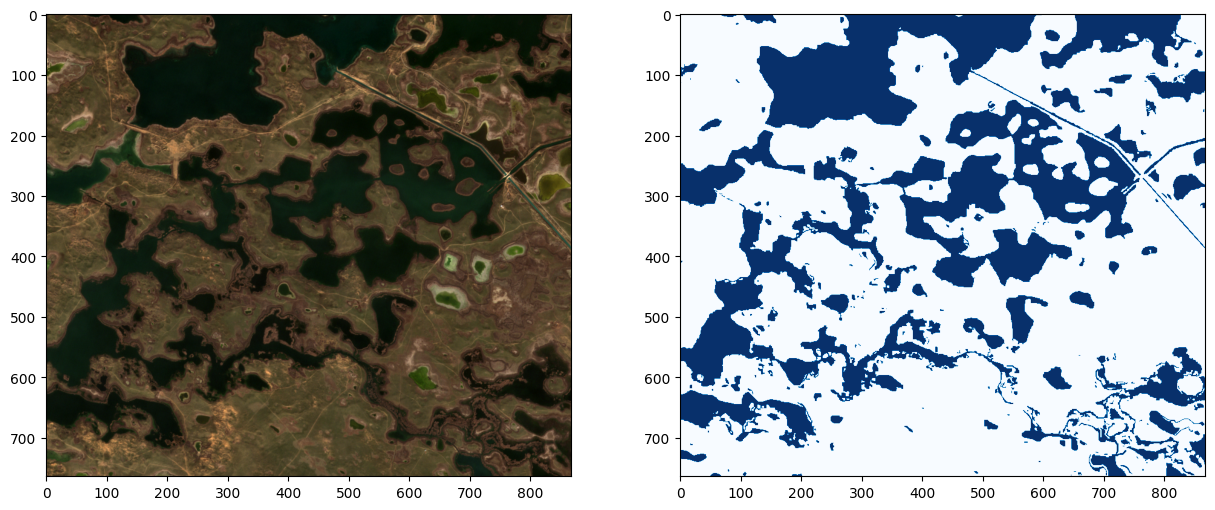

In [12]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

rgb = img.data[[2,1,0]].transpose(1,2,0)/3000
axs[0].imshow(rgb.clip(min=0, max=1))
axs[1].imshow(mask.data.squeeze(), cmap='Blues')

## Creating RasterDataset for the Images

In this section we will prepare the dataset for traininig our neural network using the [TorchGeo, RasterDataset class](https://torchgeo.readthedocs.io/en/latest/api/datasets.html#rasterdataset)

In [13]:
def scale(item: dict):
    item['image'] = item['image'] / 10000
    return item

In [14]:
from torchgeo.datasets import RasterDataset, unbind_samples, stack_samples

In [15]:
train_imgs = RasterDataset(
    paths = (root/'tra_scene').as_posix(),
    crs = 'epsg:3395',
    res=10,
    transforms=scale
)

train_mask = RasterDataset(
    paths = (root/'tra_truth').as_posix(),
    crs = "epsg:3395",
    res=10
)

train_mask.is_image = False

In [16]:
train_imgs.is_image, train_mask.is_image

(True, False)

In [17]:
len(train_imgs.files)

64

## Sampler

- To create training patches that can be fed into a neural network from our dataset,
- we need to select samples of fixed sizes.
- TorchGeo has many samplers, but here we will use the RandomGeoSampler class.
- Basically, the sampler selects random bounding boxes of fixed size that belongs to the original image.
- Then, these bounding boxes are used in the RasterDataset to query the portion of the image we want


We will use the [`RandomGeoSampler`](https://torchgeo.readthedocs.io/en/latest/api/samplers.html#random-geo-sampler)

In [18]:
from torchgeo.samplers import RandomGeoSampler

In [19]:
sampler = RandomGeoSampler(train_imgs, size=(512,512), length=100)

Size is the shape of the training patches we want and length is the number of patches this sampler will provide as one epoch.

To draw one random sample from the sampler:

In [20]:
sampler.__len__()

100

In [21]:
torch.manual_seed(0)
bbox = next(iter(sampler))
img_sample = train_imgs[bbox]
mask_sample = train_mask[bbox]

print(img_sample.keys())
print(mask_sample.keys())

print(img_sample['image'].size())

dict_keys(['crs', 'bounds', 'image'])
dict_keys(['crs', 'bounds', 'mask'])
torch.Size([6, 512, 512])


In [22]:
assert img_sample['bounds'] == mask_sample['bounds']

In [23]:
print(img_sample['image'].shape)

torch.Size([6, 512, 512])


- Note that our image has shape (6, 512, 512).
- It means we have 6 spectral channels and the size of 512 rows and 512 columns as we specified for the sampler.
- To finish this first part, we will display this sample using again the matplotlib, but taking care of the channels to display the RGB correctly.
- According to the dataset description, the 6 channels are (in this order): Blue, Green, Red, Nir, Swir1, Swir2.
- Matplotlib expects an array of shape (height, width, channels), where channels are the R, G and B (in this order)
- Besides this, we need to convert our values from integers to float and scale by 1/10000 (Sentinel-2 specs).

In [24]:
arr = torch.clamp(img_sample['image'], min=0, max=1).numpy()
print(arr.shape)

(6, 512, 512)


Here `torch.clamp`: Functionality: Each element in the input tensor is clamped to the range ([ $\text{min}, \text{max}$ ]). If an element is less than min, it is set to min. If an element is greater than max, it is set to max

(512, 512, 3)


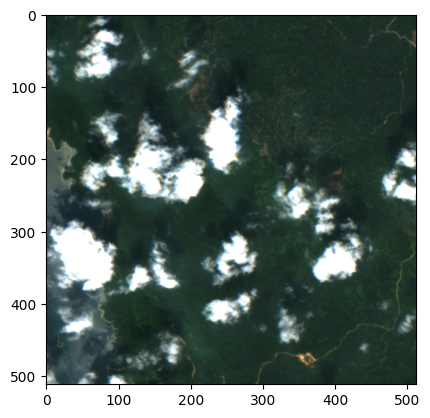

In [25]:
rgb = arr.transpose(2, 1, 0)[:, :, [2,1,0]]
print(rgb.shape)
plt.imshow(rgb*3)

# Part 2: Creating Intersection Data

we will concatenate both the images and the masks into an object called IntersectionDataset, to draw tuples with training patches (images) and corresponding labels (water masks)

In [26]:
train_dset = train_imgs & train_mask

In [27]:
train_dset

In [28]:
torch.manual_seed(0)
bbox = next(iter(sampler))

sample = train_dset[bbox]
sample.keys()

dict_keys(['crs', 'bounds', 'image', 'mask'])

## DataLoaders

What are dataloaders in Pytorch?

For loading the data to the model, we can use the pytorch dataloaders, which helps in efficiently loading and processing the data to the model.

Some key features of the dataloader are:
- Batching: divides a training dataset into small minibatches, it provides more opportunities to the model to improve more. Also this is computationally efficient.
- Shuffling the data: which helps to reduce overfitting of the model


More on [`torch.utils.data.Dataloaders`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

In [29]:
from torch.utils.data import DataLoader

In [30]:
dataloader = DataLoader(train_dset, sampler=sampler, batch_size=8, collate_fn=stack_samples)

In [31]:
batch = next(iter(dataloader))
batch.keys()

dict_keys(['crs', 'bounds', 'image', 'mask'])

In [32]:
from typing import Iterable, List

def plot_imgs(images: Iterable, axs: Iterable, chnls: List[int] = [2, 1, 0], bright: float = 3.):
    for img, ax in zip(images, axs):
        arr = torch.clamp(bright * img, min=0, max=1).numpy()
        rgb = arr.transpose(1, 2, 0)[:, :, chnls]
        ax.imshow(rgb)
        ax.axis('off')

def plot_msks(masks: Iterable, axs: Iterable):
    for mask, ax in zip(masks, axs):
        ax.imshow(mask.squeeze().numpy(), cmap='Blues')
        ax.axis('off')

def plot_batch(batch: dict, bright: float = 3., cols: int = 4, width: int = 5, chnls: List[int] = [2, 1, 0]):

    # Get the samples and the number of items in the batch
    samples = unbind_samples(batch.copy())

    # if batch contains images and masks, the number of images will be doubled
    n = 2 * len(samples) if ('image' in batch) and ('mask' in batch) else len(samples)

    # calculate the number of rows in the grid
    rows = n//cols + (1 if n%cols != 0 else 0)

    # create a grid
    _, axs = plt.subplots(rows, cols, figsize=(cols*width, rows*width))

    if ('image' in batch) and ('mask' in batch):
        # plot the images on the even axis
        plot_imgs(images=map(lambda x: x['image'], samples), axs=axs.reshape(-1)[::2], chnls=chnls, bright=bright) #type: ignore

        # plot the masks on the odd axis
        plot_msks(masks=map(lambda x: x['mask'], samples), axs=axs.reshape(-1)[1::2]) #type: ignore

    else:

        if 'image' in batch:
            plot_imgs(images=map(lambda x: x['image'], samples), axs=axs.reshape(-1), chnls=chnls, bright=bright) #type: ignore

        elif 'mask' in batch:
            plot_msks(masks=map(lambda x: x['mask'], samples), axs=axs.reshape(-1)) #type: ignore

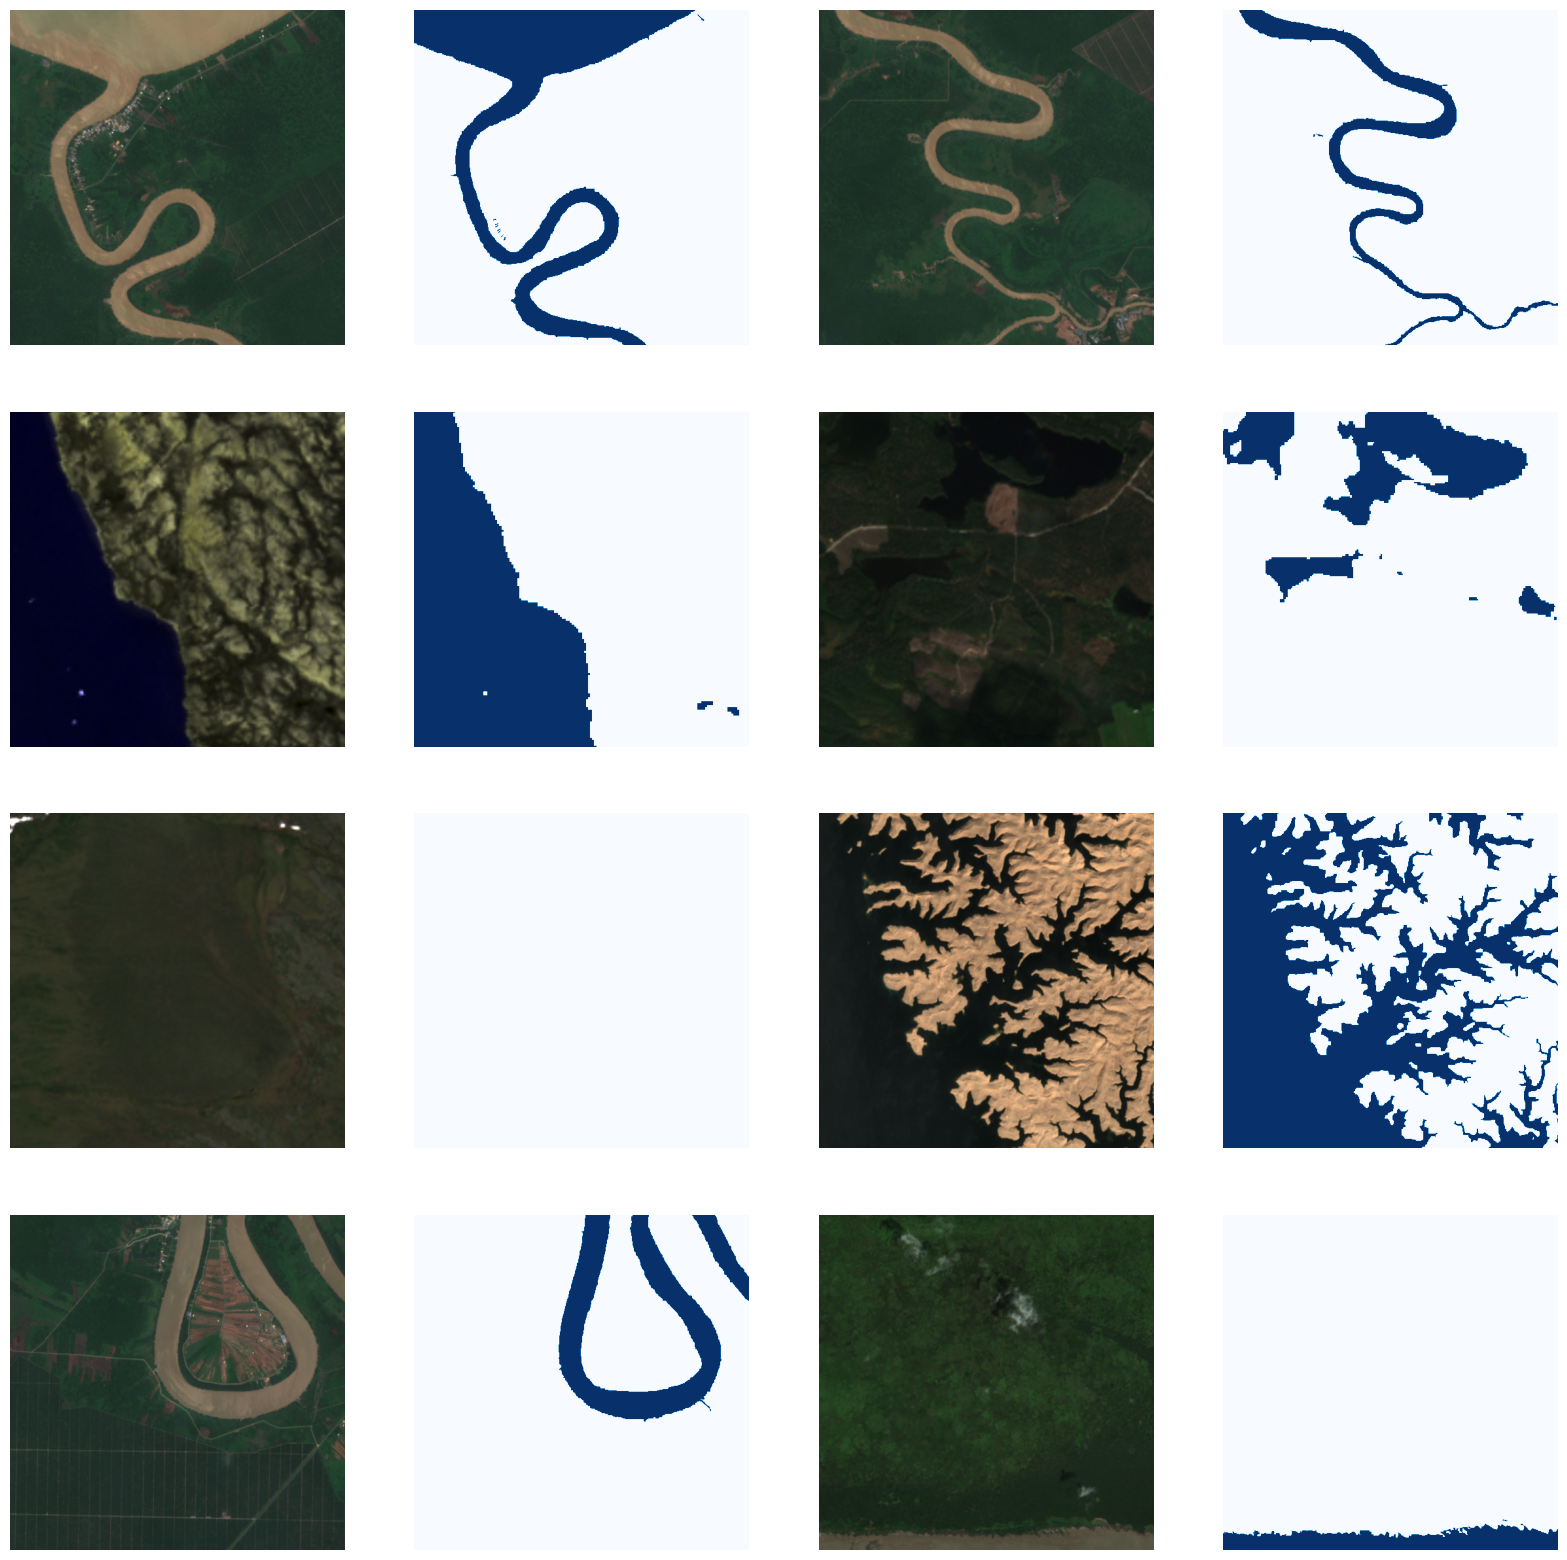

In [33]:
plot_batch(batch)

## Standardizing the values

Standardizing the values can help the model to converge, as bringing all the parameters to one scale helps the model to calculate the loss and converge to minima quickly.

The training dataset has images with shape: 6,512,512 here we have 6 bands each bands are having different distribution. We need to standardize the values so that each bands are on the same scale that will help model to learn better in an unbiased way

**About RTree**

R-tree is a tree data structure used for storing spatial data indexes in an efficient manner. R-trees are highly useful for spatial data queries and storage. Some of the real-life applications are mentioned below:

- Indexing multi-dimensional information.
- Handling geospatial coordinates.
- Implementation of virtual maps.
- Handling game data.

Custom storage implementation (to implement spatial indexing in ZODB, for example)


[More on r-tree](https://www.geeksforgeeks.org/introduction-to-r-tree/)

In [34]:
def calc_statistics(dset: RasterDataset):
        """
        Calculate the statistics (mean and std) for the entire dataset
        Warning: This is an approximation. The correct value should take into account the
        mean for the whole dataset for computing individual stds.
        For correctness I suggest checking: http://notmatthancock.github.io/2017/03/23/simple-batch-stat-updates.html
        """

        # To avoid loading the entire dataset in memory, we will loop through each img
        # The filenames will be retrieved from the dataset's rtree index
        files = [item.object for item in dset.index.intersection(dset.index.bounds, objects=True)]

        # Reseting statistics
        accum_mean = 0
        accum_std = 0

        for file in tqdm(files):
            img = rio.open(file).read()/10000 #type: ignore
            accum_mean += img.reshape((img.shape[0], -1)).mean(axis=1)
            accum_std += img.reshape((img.shape[0], -1)).std(axis=1)

        # at the end, we shall have 2 vectors with lenght n=chnls
        # we will average them considering the number of images
        return accum_mean / len(files), accum_std / len(files)

mean, std = calc_statistics(train_imgs)
print(mean, std)

  0%|          | 0/64 [00:00<?, ?it/s]

[0.0771449  0.09890421 0.09758993 0.22216185 0.1854808  0.13288888] [0.04496952 0.05038998 0.06053346 0.10840577 0.0993342  0.08219175]


Here we have created a function to find the mean bandwise for a given batch of images from the training dataset.

We will automate this function to perform same operation on all the batches.

Also we need to create a function that would revert back to original scale for plotting purpose.

We will use `torch.nn.Module` class to create this functions. It is a base class for creating custom neural network model using pytorch. It has some default functions:

- `forward`: for forward pass
- `zero_grad()`: resetting the gradients after each training
- `parameters`: for accessing the model's parameter



In [35]:
class MyNormalize(torch.nn.Module):
    def __init__(self, mean: List[float], stdev: List[float]):
        super().__init__()

        self.mean = torch.Tensor(mean)[:, None, None]
        self.std = torch.Tensor(stdev)[:, None, None]

    def forward(self, inputs: dict):

        x = inputs["image"][..., : len(self.mean), :, :]

        # if batch
        if inputs["image"].ndim == 4:
            x = (x - self.mean[None, ...]) / self.std[None, ...]

        else:
            x = (x - self.mean) / self.std

        inputs["image"][..., : len(self.mean), :, :] = x

        return inputs

    def revert(self, inputs: dict):
        """
        De-normalize the batch.
        Args:
            inputs (dict): Dictionary with the 'image' key
        """

        x = inputs["image"][..., : len(self.mean), :, :]

        # if batch
        if x.ndim == 4:
            x = inputs["image"][:, : len(self.mean), ...]
            x = x * self.std[None, ...] + self.mean[None, ...]
        else:
            x = x * self.std + self.mean

        inputs["image"][..., : len(self.mean), :, :] = x

        return inputs

In [36]:
normalize = MyNormalize(mean=mean, stdev=std)
norm_batch = normalize(batch)
plot_batch(norm_batch)

batch = normalize.revert(norm_batch)
plot_batch(batch)

Output hidden; open in https://colab.research.google.com to view.

## Feature Engineering


To Improve the model learning, we will introduce some more bands derived from the existing bands like NDWI, NDVI and MNDWI.

In [37]:
from torchgeo.transforms import indices

/usr/local/lib/python3.10/dist-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [38]:
ndwi_transform = indices.AppendNDWI(index_green=1, index_nir = 3)
ndwi_transform

AppendNDWI(p=1, p_batch=1.0, same_on_batch=False, index_a=1, index_b=3)

In [39]:
transformed_batch = ndwi_transform(batch['image'])
transformed_batch.shape

torch.Size([8, 7, 512, 512])

Now the number of bands has increased to 7 as we have added one more new band: NDWI

Similarly we will the other 2 bands, but with a pipeline function using `nn.Sequential`

More on [`torch.nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#sequential)

In [40]:
def transform_images(batch):

    '''
    Function to add 3 more indices namely NDWI, MNDWI and NDVI to given batch of images
    '''
    addIndices = torch.nn.Sequential(
        indices.AppendNDWI(index_green=1, index_nir = 3),
        indices.AppendNDWI(index_green=1, index_nir = 5),
        indices.AppendNDVI(index_nir=3, index_red = 2),
    )

    batch['image'] = addIndices(batch['image'])
    transformed_batch = normalize(new_batch)

    return transformed_batch

In [41]:
new_batch = batch.copy()

transformed_batch = transform_images(new_batch)
print(transformed_batch['image'].shape, transformed_batch['mask'].shape)

torch.Size([8, 9, 512, 512]) torch.Size([8, 1, 512, 512])


# Part 3: Training the model

## Datasets and Dataloaders

We need to create two datasets and dataloaders for each training and testing set.

In [42]:
def scale_image(item):
    item['image'] = item['image'] / 10000
    return item

## Load the training images and mask as RasterDataset
train_imgs = RasterDataset(paths = (root/'tra_scene').as_posix(), crs='epsg:3395', res=10, transforms=scale_image)
train_mask = RasterDataset(paths = (root/'tra_truth').as_posix(), crs='epsg:3395', res=10)

## Load the validation images and mask as RasterDataset
val_imgs = RasterDataset(paths = (root/'val_scene').as_posix(), crs = "EPSG:3395", res=10, transforms=scale_image)
val_mask = RasterDataset(paths = (root/'val_truth').as_posix(), crs = "EPSG:3395", res=10)

## Set the mask images as mask
train_mask.is_image = False
val_mask.is_image = False

## Now concat the dataset to one single RasterDataset
train_dset= train_imgs & train_mask
val_dset = val_imgs & val_mask

## Create the GeoSamplers
train_sampler = RandomGeoSampler(train_imgs, size=(512,512), length = 260)
val_sampler = RandomGeoSampler(val_imgs, size=(512,512), length = 260)

The length of the sampler = `260` is one epoch, so while training each iteration will pass through each 260 images.

Also note that we can using RandomSampler which doesnot garauntee covering all the parts of the images.

Now let's create the dataloaders:

In [43]:
train_dataloader = DataLoader(train_dset, sampler=train_sampler, batch_size=8, collate_fn=stack_samples)
val_dataloader = DataLoader(val_dset, sampler=val_sampler, batch_size=8, collate_fn=stack_samples)

## Check the first batch
train_batch = next(iter(train_dataloader))
val_batch = next(iter(val_dataloader))

print(train_batch.keys())
print(val_batch.keys())

print("Size of the train image tensor:",train_batch['image'].size())
print("Size of the train mask tensor:", train_batch['mask'].size())

print("Size of the val image tensor:",val_batch['image'].size())
print("Size of the val mask tensor:", val_batch['mask'].size())

print(val_batch['image'].size())

dict_keys(['crs', 'bounds', 'image', 'mask'])
dict_keys(['crs', 'bounds', 'image', 'mask'])
Size of the train image tensor: torch.Size([8, 6, 512, 512])
Size of the train mask tensor: torch.Size([8, 1, 512, 512])
Size of the val image tensor: torch.Size([8, 6, 512, 512])
Size of the val mask tensor: torch.Size([8, 1, 512, 512])
torch.Size([8, 6, 512, 512])


## Standardizing and Spectral Indices

We will repeat the standardization and introduce additional indices to our training images

## Segmentation Model

For semantic segmentation, we are going to use pretrained model available in torchgeo library

Read more on [Semantic Segmentation](https://pytorch.org/vision/stable/models.html#semantic-segmentation)

There are three models which are pretrained and also available without pretraining, the one we are going to use is [DeepLabV3](https://pytorch.org/vision/stable/models/deeplabv3.html)

In [44]:
from torchvision.models.segmentation import deeplabv3_resnet50

In [45]:
model = deeplabv3_resnet50(weights=None, num_classes=2)
model

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 138MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

## Visualizing a model's architecture

In [46]:
# !pip install -q torchviz
# from torchviz import make_dot

# # Load the model
# model = deeplabv3_resnet50(pretrained=False)

# # Set the model to evaluation mode
# model.eval()

# # Create a dummy input tensor with the appropriate shape
# x = torch.randn(1, 3, 224, 224)

# # Perform a forward pass to get the output
# y = model(x)['out']

# # Visualize the model architecture
# dot = make_dot(y, params=dict(model.named_parameters()))

# dot.render("deeplabv3_resnet50_architecture", format="png")

## Modify the first layer

here we will modify the architecture a bit, specifically the input and the output layer to suit our use case. The first layer of the model takes in the input image with 3 channnels (RGB) but in our case we have 9 channels, so we will modify the first layer

In [56]:
backbone = model.get_submodule('backbone')
conv = torch.nn.modules.conv.Conv2d(
    in_channels=9,
    out_channels=64,
    kernel_size=(7,7),
    stride=(2,2),
    padding = (3,3),
    bias=False
)

backbone.register_module('conv1', conv)

## One forward pass to check if the model is working as required
# pred = model(torch.randn(8,9,512,512))
# pred['out'].shape

# # Output: torch.Size([8, 2, 512, 512])

Once we make sure the inputs and outputs of the model is working and results are as expected, we can proceed with training the model

## Training the model

- define the training loop function
- define the loss functions

In [58]:
from sklearn.metrics import jaccard_score
from typing import Optional, List, Callable

In [66]:
def train_loop(
    epochs: int,
    train_dl: DataLoader,
    val_dl: Optional[DataLoader],
    model: torch.nn.Module,
    loss_fn: Callable,
    optimizer: torch.optim.Optimizer,
    acc_fns: Optional[List]=None,
    batch_tfms: Optional[Callable]=None
):
    # size = len(dataloader.dataset)
    cuda_model = model.cuda()

    for epoch in range(epochs):
        accum_loss = 0
        for batch in train_dl:

            if batch_tfms is not None:
                batch = batch_tfms(batch)

            X = batch['image'].cuda()
            y = batch['mask'].type(torch.long).cuda()
            pred = cuda_model(X)['out']
            loss = loss_fn(pred, y)

            # BackProp
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update the accum loss
            accum_loss += float(loss) / len(train_dl)

        # Testing against the validation dataset
        if acc_fns is not None and val_dl is not None:
            # reset the accuracies metrics
            acc = [0.] * len(acc_fns)

            with torch.no_grad():
                for batch in val_dl:

                    if batch_tfms is not None:
                        batch = batch_tfms(batch)

                    X = batch['image'].type(torch.float32).cuda()
                    y = batch['mask'].type(torch.long).cuda()

                    pred = cuda_model(X)['out']

                    for i, acc_fn in enumerate(acc_fns):
                        acc[i] = float(acc[i] + acc_fn(pred, y)/len(val_dl))

            # at the end of the epoch, print the errors, etc.
            print(f'Epoch {epoch}: Train Loss={accum_loss:.5f} - Accs={[round(a, 3) for a in acc]}')
        else:

            print(f'Epoch {epoch}: Train Loss={accum_loss:.5f}')


def oa(pred, y):
    flat_y = y.squeeze()
    flat_pred = pred.argmax(dim=1)
    acc = torch.count_nonzero(flat_y == flat_pred) / torch.numel(flat_y)
    return acc

def iou(pred, y):
    flat_y = y.cpu().numpy().squeeze()
    flat_pred = pred.argmax(dim=1).detach().cpu().numpy()
    return jaccard_score(flat_y.reshape(-1), flat_pred.reshape(-1), zero_division=1.)

def loss(p, t):
    return torch.nn.functional.cross_entropy(p, t.squeeze())

In [ ]:
%%time

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
train_loop(5, train_dataloader, val_dataloader, model, loss, optimizer,  acc_fns=[oa, iou], batch_tfms=transform_images)

Epoch 0: Train Loss=nan - Accs=[0.815, 0.0]
Epoch 1: Train Loss=nan - Accs=[0.815, 0.0]
Epoch 2: Train Loss=nan - Accs=[0.815, 0.0]
Epoch 3: Train Loss=nan - Accs=[0.815, 0.0]
Epoch 4: Train Loss=nan - Accs=[0.815, 0.0]
CPU times: user 12min 59s, sys: 58.8 s, total: 13min 58s
Wall time: 14min 4s
